**We will perform CNN on Cats and Dogs Dataset.**

import the important libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

To visualise the data properly we will use this below data

In [71]:
# Make some settings for pandas and plotting
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
plt.rcParams['font.size']=12

We will import the data

In [72]:
train_data_dir="../input/dogs-cats-images/dog vs cat/dataset/training_set"
test_data_dir="../input/dogs-cats-images/dog vs cat/dataset/test_set"

We have the training images in the train_data_dir and testing images in the test_data_dir.

Now we will check that how many images we have of the cats and dogs in the training as well testing directory

In [73]:
train_dogs = train_data_dir+'/dogs'
train_cats = train_data_dir+'/cats'
test_dogs = test_data_dir+'/dogs'
test_cats = test_data_dir+'/cats'

print(len(os.listdir(train_cats)))
print(len(os.listdir(train_dogs)))
print(len(os.listdir(test_cats)))
print(len(os.listdir(test_dogs)))

4000
4000
1000
1000


We can see that our data is clearly balanced as both  the training and testing data consists of 4000 and 1000 images  each of cats and dogs respectively

now let us visualise the data manually

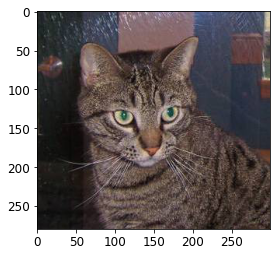

In [74]:
plt.imshow(plt.imread(train_data_dir+'/cats/cat.1.jpg'))

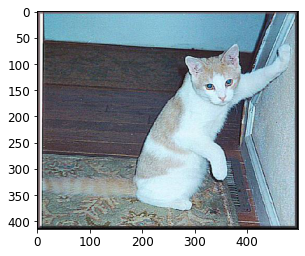

In [75]:
plt.imshow(plt.imread(test_data_dir+'/cats/cat.4001.jpg'))

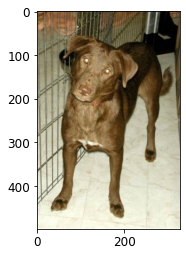

In [76]:
plt.imshow(plt.imread(train_data_dir+'/dogs/dog.1.jpg'))

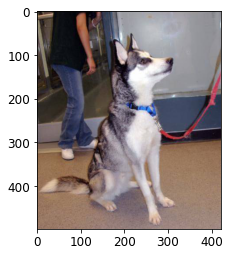

In [77]:
plt.imshow(plt.imread(test_data_dir+'/dogs/dog.4001.jpg'))

now after visualising let us check the shape of the random images

In [78]:
plt.imread(train_data_dir+'/cats/cat.100.jpg').shape

(499, 403, 3)

In [79]:
plt.imread(test_data_dir+'/cats/cat.4100.jpg').shape

(375, 499, 3)

In [80]:
plt.imread(train_data_dir+'/dogs/dog.100.jpg').shape

(397, 500, 3)

In [81]:
plt.imread(test_data_dir+'/dogs/dog.4100.jpg').shape

(499, 376, 3)

Now from above we can clearly say that our images are of different shapes . So we will convert all the images in a fixed shape which our model can understand

Also the no of images are less in this data so we will need to augment the data, also we will need to rescale the data as it will be of varied range, all this task can be done using image data generator

In [82]:
# we will import image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Now we will import the ImageDataGenerator function into a varible we want with the parameters we want

In [83]:
ImageDataGenerator?

In [84]:
train_image_generator=ImageDataGenerator(rescale=1./255,horizontal_flip=0.2,shear_range=0.2,zoom_range=0.2)
val_image_generator=ImageDataGenerator(rescale=1./255)


Here make sure we perform all this operations only on the training data. to generate more images not on the validation data(except rescale) as it for just checking out how the model created from the training dataset is performing

* rescale=1./255 , we normalized the data for the algorithm to understand
* horizontal_flip=0.2 , we flipped the data or made the mirror image of the original image horizontaly
* shear_range=0.2 , cutting certain parts of the images and putting somewhere else
* zoom_range=0.2 , we zoomed the image
* many other parameters can also be performed on this imagedatagenerator

By doing this we are creating more images for the training dataset

In [85]:
# We will resize the images so that all the images in the dataset will be of the same size
image_height,image_width = 150,150
# Here we will take the batch size as per our requirement
batch_size=32 

Now we will apply all the above parameters which we defined on the dataset

In [86]:
train_data_gen=train_image_generator.flow_from_directory(directory=train_data_dir, target_size=(image_width,image_height),
                                                        shuffle=True, batch_size=batch_size, classes=['cats','dogs'],
                                                        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [87]:
val_data_gen=val_image_generator.flow_from_directory(directory=test_data_dir, target_size=(image_height,image_width),
                                                    batch_size=batch_size,class_mode='binary')

Found 2000 images belonging to 2 classes.


Here we have classes in ['cats','dogs'], so the classification cats will take a label of 0 and dogs will take a label of 1

Let us look at the augmented images 

In [88]:
def Plotimages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()        

Above we created a function just to have look at the augmentation of the images

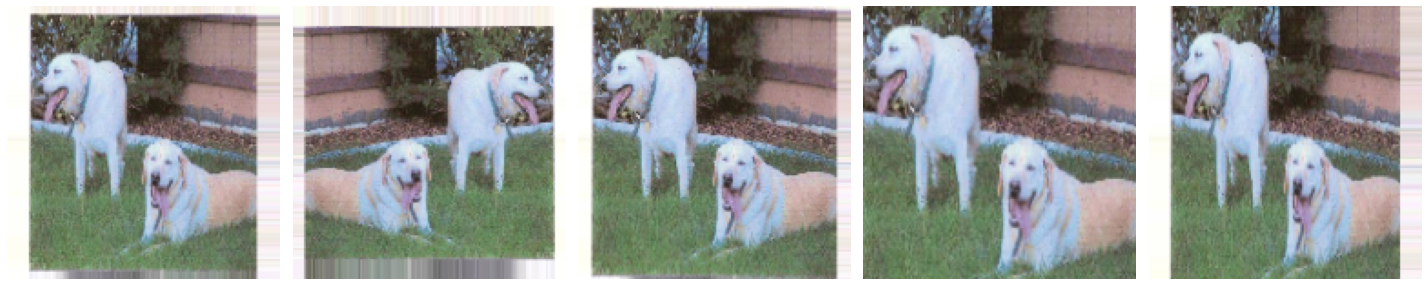

In [89]:
# using an indexing to generate different images of a same image
augmented_images = [train_data_gen[0][0][2] for i in range(5)]

Plotimages(augmented_images)

Here we can change this following parameters for different images train_image_generator=ImageDataGenerator(rescale=1./255, horizontal_flip=0.2, shear_range=0.2, zoom_range=0.2)

**Build a Model**

In [90]:
# import the libraries for the model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten

In [91]:
# import model
model=Sequential()
# import layers
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(image_height,image_width,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [92]:
# check the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

In [93]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
%%time
# Fitting CNN Model
model.fit_generator(generator= train_data_gen,
#                     steps_per_epoch= 8005//batch_size,
                    steps_per_epoch= 120,                    
                    epochs= 10,
                    validation_data= val_data_gen,
#                     validation_steps= 2023//batch_size
                    validation_steps= 32)

# %%time
# # Fitting the model
# model.fit_generator(generator=train_data_gen, steps_per_epoch=100, epochs=10, 
#                     validation_data=val_data_gen, validation_steps=100)

Train for 120 steps, validate for 32 steps
Epoch 1/10
120/120 [==============================] - 95s 789ms/step - loss: 0.6908 - accuracy: 0.5154 - val_loss: 0.6706 - val_accuracy: 0.5771
Epoch 2/10
120/120 [==============================] - 95s 788ms/step - loss: 0.6608 - accuracy: 0.5935 - val_loss: 0.6281 - val_accuracy: 0.6465
Epoch 3/10
120/120 [==============================] - 95s 789ms/step - loss: 0.6255 - accuracy: 0.6547 - val_loss: 0.5989 - val_accuracy: 0.6865
Epoch 4/10
120/120 [==============================] - 103s 862ms/step - loss: 0.6203 - accuracy: 0.6565 - val_loss: 0.5763 - val_accuracy: 0.7002
Epoch 5/10
120/120 [==============================] - 95s 788ms/step - loss: 0.5703 - accuracy: 0.7078 - val_loss: 0.5841 - val_accuracy: 0.7100
Epoch 6/10
120/120 [==============================] - 113s 939ms/step - loss: 0.5566 - accuracy: 0.7146 - val_loss: 0.5462 - val_accuracy: 0.7256
Epoch 7/10
120/120 [==============================] - 95s 788ms/step - loss: 0.5156 -

Plot the images


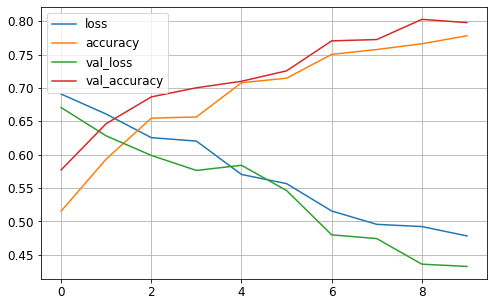

In [95]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()